# Comparing LLMs on Indian Language Tasks: Claude 3.5 Sonnet, GPT-4, and Llama 3.1 405B

## Introduction

This notebook compares the performance of three large language models (Claude 3.5 Sonnet, GPT-4, and Llama 3.1 405B) on various tasks in Indian languages. We'll explore:

1. Setting up the environment
2. Defining helper functions for API calls
3. Comparing models on translation tasks
4. Evaluating complex reasoning and generation tasks
5. Assessing language understanding capabilities
6. Visualizing and analyzing results


## Installing Requirements

In [17]:
!pip install openai --quiet

## LLAMA 3 405B as an Essay Writer

In [15]:
from openai import OpenAI

# Set up the OpenAI client with OpenRouter for LLAMA 3 405B
client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=userdata.get('OPENROUTER_API_KEY'),
)

LLAMA_MODEL = "meta-llama/llama-3.1-405b-instruct"


def generate_essay(topic, word_count):
    prompt = f"""
    Write an informative and engaging essay on the topic: "{topic}"

    The essay should be approximately {word_count} words long.
    Please provide a well-structured essay with an introduction, body paragraphs, and a conclusion.

    Essay:
    """

    try:
        completion = client.chat.completions.create(
            extra_headers={

            },
            model=LLAMA_MODEL,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=word_count * 2  # Assuming an average of 2 tokens per word
        )
        return completion.choices[0].message.content.strip()
    except Exception as e:
        return f"An error occurred: {str(e)}"

# User interface
print("Welcome to the LLAMA 3 405B Essay Generator!")

while True:
    topic = input("Enter the essay topic (or 'quit' to exit): ")
    if topic.lower() == 'quit':
        break

    word_count = int(input("Enter the desired word count: "))

    essay = generate_essay(topic, word_count)
    print(f"\nGenerated Essay ({len(essay.split())} words):")
    print(essay)
    print()

print("Thank you for using the LLAMA 3 405B Essay Generator!")

Welcome to the LLAMA 3 405B Essay Generator!
Enter the essay topic (or 'quit' to exit): Use of AI in 2024
Enter the desired word count: 150

Generated Essay (208 words):
**The Rise of AI in 2024: Revolutionizing Industries and Lives**

As we step into 2024, the role of Artificial Intelligence (AI) in our lives has become more profound than ever. AI has emerged as a transformative technology, revolutionizing industries and the way we interact with the world.

**Efficient Processes, Enhanced Services**

Across sectors, AI is increasingly being adopted to optimize efficiency and productivity. Healthcare, for instance, leverages AI for predictive diagnostics, enabling earlier and more accurate disease detection. Financial institutions use AI for risk assessment and personalized customer service, providing tailored solutions. The retail sector benefits from AI-powered chatbots that offer instant customer support, improving user experience and driving engagement.

**Shaping the Future**

As 

## Helper Functions

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from openai import OpenAI
#from dotenv import load_dotenv
import os
from google.colab import userdata
# Load environment variables

#os.getenviron['OPENROUTER_API_KEY'] = userdata.get('OPENROUTER_API_KEY')
# Set up the OpenAI client with OpenRouter for Llama and GPT-4
openai_client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=userdata.get("OPENROUTER_API_KEY"),
)

# Define the models
LLAMA_MODEL = "meta-llama/llama-3.1-405b-instruct"
GPT4_MODEL = "openai/gpt-4"
CLAUDE_MODEL = "anthropic/claude-3.5-sonnet"

# Your app details
YOUR_SITE_URL = "https://your-app-url.com"  # Replace with your actual URL
YOUR_APP_NAME = "LLMIndianLanguageComparison"  # Replace with your app name

print("Environment set up successfully!")

def get_llama_completion(prompt, max_tokens=1000):
    try:
        completion = openai_client.chat.completions.create(
            extra_headers={
                "HTTP-Referer": YOUR_SITE_URL,
                "X-Title": YOUR_APP_NAME,
            },
            model=LLAMA_MODEL,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens
        )
        return completion.choices[0].message.content.strip()
    except Exception as e:
        print(f"An error occurred with Llama: {e}")
        return None

def get_gpt4_completion(prompt, max_tokens=1000):
    try:
        completion = openai_client.chat.completions.create(
            extra_headers={
                "HTTP-Referer": YOUR_SITE_URL,
                "X-Title": YOUR_APP_NAME,
            },
            model=GPT4_MODEL,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens
        )
        return completion.choices[0].message.content.strip()
    except Exception as e:
        print(f"An error occurred with GPT-4: {e}")
        return None

def get_claude_completion(prompt, max_tokens=1000):
    try:
        completion = openai_client.chat.completions.create(
            extra_headers={
                "HTTP-Referer": YOUR_SITE_URL,
                "X-Title": YOUR_APP_NAME,
            },
            model=CLAUDE_MODEL,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens
        )
        return completion.choices[0].message.content.strip()
    except Exception as e:
        print(f"An error occurred with Claude: {e}")
        return None

print("Helper functions defined successfully!")

Environment set up successfully!
Helper functions defined successfully!


# Comparing models on translation tasks
Let's compare the models' ability to translate between English and various Indian languages.

Collecting responses of the following models:


*   Claude 3.5 sonnet
*   gpt-4o
*   LLAMA 3 405B

Download the results:
* <a href="https://drive.google.com/file/d/1yyVO1MQdm--jmlyoude-q9WWb786Bzai/view?usp=sharing" target="_blank">Download Translation Results CSV</a>
* <a href="https://drive.google.com/file/d/1v7f7LNRtIpSjOpmAayn6E17oupxI5e9J/view?usp=sharing" target="_blank">Download Complex Task Results CSV</a>



### Translation Task

In [11]:
# Define languages and example sentences
languages = ["Hindi", "Bengali", "Tamil", "Telugu", "Marathi"]
example_sentences = {
    "Hindi": "आर्टिफिशियल इंटेलिजेंस दुनिया को अभूतपूर्व तरीकों से बदल रही है।",
    "Bengali": "কৃত্রিম বুদ্ধিমত্তা অভূতপূর্ব উপায়ে বিশ্বকে রূপান্তরিত করছে।",
    "Tamil": "செயற்கை நுண்ணறிவு உலகை முன்னெப்போதும் இல்லாத வகையில் மாற்றி வருகிறது.",
    "Telugu": "కృత్రిమ మేధస్సు ప్రపంచాన్ని అపూర్వమైన మార్గాల్లో మార్చివేస్తోంది.",
    "Marathi": "कृत्रिम बुद्धिमत्ता जगाला अभूतपूर्व मार्गांनी बदलत आहे."
}

# Define translation tasks
translation_tasks = [
    {
        "source": "English",
        "target": lang,
        "text": "Artificial intelligence is transforming the world in unprecedented ways."
    } for lang in languages
] + [
    {
        "source": lang,
        "target": "English",
        "text": example_sentences[lang]
    } for lang in languages
]

results = []

for task in tqdm(translation_tasks, desc="Comparing translations"):
    prompt = f"Translate the following {task['source']} text to {task['target']}:\n\n{task['text']}\n\nTranslation:"

    llama_response = get_llama_completion(prompt)
    gpt4_response = get_gpt4_completion(prompt)
    claude_response = get_claude_completion(prompt)

    results.append({
        "Task": f"{task['source']} to {task['target']}",
        "Llama": llama_response,
        "GPT-4": gpt4_response,
        "Claude": claude_response
    })

translation_df = pd.DataFrame(results)
print(translation_df)

print("\nTranslation comparison completed!")

# Optional: Save results to a CSV file
translation_df.to_csv("translation_comparison_results.csv", index=False)
print("Results saved to translation_comparison_results.csv")

Comparing translations: 100%|██████████| 10/10 [01:21<00:00,  8.11s/it]

                 Task                                              Llama  \
0    English to Hindi  कृत्रिम बुद्धिमत्ता दुनिया को अभूतपूर्व तरीकों...   
1  English to Bengali  কৃত্রিম বুদ্ধিমত্তা অভূতপূর্ব উপায়ে বিশ্বকে র...   
2    English to Tamil  செயற்கை நுண்ணறிவு உலகை முன்னெப்போதும் இல்லாத வ...   
3   English to Telugu  కృత్రిమ మేధస్సు ప్రపంచాన్ని ఎప్పటికీ చూడని మార...   
4  English to Marathi  कृत्रिम बुद्धिमत्ता ही जगाला आमूलाग्रपणे बदलण्...   
5    Hindi to English  Here is the translation of the Hindi text to E...   
6  Bengali to English  Artificial intelligence is transforming the wo...   
7    Tamil to English  Artificial intelligence is transforming the wo...   
8   Telugu to English  Artificial intelligence is changing the world ...   
9  Marathi to English  Here is the translation:\n\n"Artificial intell...   

                                               GPT-4  \
0  कृत्रिम बुद्धिमत्ता अभूतपूर्व तरीकों से दुनिया...   
1  কৃত্রিম বুদ্ধিমত্তা অপ্রাকৃতিক পন্থায় বিশ্বকে..

In [12]:
df = pd.read_csv("/content/translation_comparison_results.csv")
df.head(10)

Task                                              Llama  \
0    English to Hindi  कृत्रिम बुद्धिमत्ता दुनिया को अभूतपूर्व तरीकों...   
1  English to Bengali  কৃত্রিম বুদ্ধিমত্তা অভূতপূর্ব উপায়ে বিশ্বকে র...   
2    English to Tamil  செயற்கை நுண்ணறிவு உலகை முன்னெப்போதும் இல்லாத வ...   
3   English to Telugu  కృత్రిమ మేధస్సు ప్రపంచాన్ని ఎప్పటికీ చూడని మార...   
4  English to Marathi  कृत्रिम बुद्धिमत्ता ही जगाला आमूलाग्रपणे बदलण्...   
5    Hindi to English  Here is the translation of the Hindi text to E...   
6  Bengali to English  Artificial intelligence is transforming the wo...   
7    Tamil to English  Artificial intelligence is transforming the wo...   
8   Telugu to English  Artificial intelligence is changing the world ...   
9  Marathi to English  Here is the translation:\n\n"Artificial intell...   

                                               GPT-4  \
0  कृत्रिम बुद्धिमत्ता अभूतपूर्व तरीकों से दुनिया...   
1  কৃত্রিম বুদ্ধিমত্তা অপ্রাকৃতিক পন্থায় বিশ্বকে...   
2  செயற்கை அறிவு முன்னரியாகவும் வித்தியாசமாகவும் ...   
3  కృత్రిమ మేధాశక్తి ముందువాని విధాలుగా ప్రపంచాన్...   
4  कृत्रिम बुद्धिमत्ता म्हणजेच क्रांतिकारक प्रकार...   
5  Artificial intelligence is changing the world ...   
6  Artificial intelligence is transforming the wo...   
7  Artificial intelligence is changing the world ...   
8  Artificial intelligence is transforming the wo...   
9  Artificial intelligence is transforming the wo...   

                                              Claude  
0  Here's the translation of the given English te...  
1  Here is the translation of the given English t...  
2  Here is the translation of the given English t...  
3  Here is the translation of the given English t...  
4  Here's the translation of the given English te...  
5  The English translation of the Hindi text is:\...  
6  Artificial intelligence is transforming the wo...  
7  Artificial intelligence is transforming the wo...  
8  The English translation of the Telugu text is:...  
9  Artificial intelligence is changing the world ...

### Complex Task

In [13]:
complex_tasks = [
    {
        "language": "Hindi",
        "task": "भारत में शिक्षा प्रणाली के सुधार के लिए पांच महत्वपूर्ण सुझाव दें।",
        "description": "Provide five important suggestions for improving the education system in India."
    },
    {
        "language": "Bengali",
        "task": "জলবায়ু পরিবর্তনের প্রভাব কমাতে বাংলাদেশ কী পদক্ষেপ নিতে পারে তার একটি বিশ্লেষণ লিখুন।",
        "description": "Write an analysis of steps Bangladesh can take to mitigate the effects of climate change."
    },
    {
        "language": "Tamil",
        "task": "தென்னிந்திய சினிமாவின் உலகளாவிய செல்வாக்கு பற்றி ஒரு விமர்சன கட்டுரை எழுதுங்கள்.",
        "description": "Write a critical essay about the global influence of South Indian cinema."
    },
    {
        "language": "Telugu",
        "task": "భారతదేశంలో సాంకేతిక పరిజ్ఞానం మరియు సాంప్రదాయ జ్ఞానం మధ్య సమతుల్యతను ఎలా సాధించవచ్చు?",
        "description": "How can India achieve a balance between technological advancement and traditional knowledge?"
    },
    {
        "language": "Marathi",
        "task": "महाराष्ट्रातील पाणी टंचाई समस्येवर मात करण्यासाठी नवीन तंत्रज्ञानाचा वापर कसा करता येईल?",
        "description": "How can new technologies be used to address the water scarcity problem in Maharashtra?"
    }
]

complex_results = []

for task in tqdm(complex_tasks, desc="Comparing complex tasks"):
    prompt = f"""
    {task['description']}

    Task: {task['task']}

    Please provide a detailed response in {task['language']}, followed by an English translation.
    """

    llama_response = get_llama_completion(prompt)
    gpt4_response = get_gpt4_completion(prompt)
    claude_response = get_claude_completion(prompt)

    complex_results.append({
        "Task": f"{task['language']}: {task['description']}",
        "Llama": llama_response,
        "GPT-4": gpt4_response,
        "Claude": claude_response
    })

complex_df = pd.DataFrame(complex_results)
print(complex_df)

print("\nComplex task comparison completed!")

Comparing complex tasks: 100%|██████████| 5/5 [06:46<00:00, 81.35s/it]

                                                Task  \
0  Hindi: Provide five important suggestions for ...   
1  Bengali: Write an analysis of steps Bangladesh...   
2  Tamil: Write a critical essay about the global...   
3  Telugu: How can India achieve a balance betwee...   
4  Marathi: How can new technologies be used to a...   

                                               Llama  \
0  **शिक्षा सुधार के लिए पांच महत्वपूर्ण सुझाव**\...   
1  **বাংলায় বিশ্লেষণ:**\n\nজলবায়ু পরিবর্তন বাংলা...   
2  **Tamil Response**\n\nதென்னிந்திய சினிமாவின் உ...   
3  **తెలుగు ప్రతిస్పందన**\n\nభారతదేశంలో సాంకేతిక ...   
4  **मराठी मध्ये उत्तर**\n\nमहाराष्ट्रातील पाणी ट...   

                                               GPT-4  \
0  1. गुणवत्ता आधारित शिक्षा: शिक्षा प्रणाली में ...   
1  বাংলাদেশ জলবায়ু পরিবর্তনের প্রভাব কমাতে নিম্ন...   
2  Title: தென்னிந்திய சினிமாவின் உலகளாவிய செல்வாக...   
3  భారతదేశంలో సాంకేతిక పరిజ్ఞానం మరియు సాంప్రదాయ ...   
4  महाराष्ट्रातील पाणीची टंचाईच्या समस्येकरिता

In [14]:
complex_df.to_csv("translation_comparison_results_complex.csv", index=False)
print("Results saved to translation_comparison_results.csv")

Results saved to translation_comparison_results.csv


In [16]:
df = pd.read_csv("/content/translation_comparison_results_complex.csv")
df.head(10)

Task  \
0  Hindi: Provide five important suggestions for ...   
1  Bengali: Write an analysis of steps Bangladesh...   
2  Tamil: Write a critical essay about the global...   
3  Telugu: How can India achieve a balance betwee...   
4  Marathi: How can new technologies be used to a...   

                                               Llama  \
0  **शिक्षा सुधार के लिए पांच महत्वपूर्ण सुझाव**\...   
1  **বাংলায় বিশ্লেষণ:**\n\nজলবায়ু পরিবর্তন বাংলা...   
2  **Tamil Response**\n\nதென்னிந்திய சினிமாவின் உ...   
3  **తెలుగు ప్రతిస్పందన**\n\nభారతదేశంలో సాంకేతిక ...   
4  **मराठी मध्ये उत्तर**\n\nमहाराष्ट्रातील पाणी ट...   

                                               GPT-4  \
0  1. गुणवत्ता आधारित शिक्षा: शिक्षा प्रणाली में ...   
1  বাংলাদেশ জলবায়ু পরিবর্তনের প্রভাব কমাতে নিম্ন...   
2  Title: தென்னிந்திய சினிமாவின் உலகளாவிய செல்வாக...   
3  భారతదేశంలో సాంకేతిక పరిజ్ఞానం మరియు సాంప్రదాయ ...   
4  महाराष्ट्रातील पाणीची टंचाईच्या समस्येकरिता नव...   

                                              Claude  
0  हिंदी में उत्तर:\n\n1. पाठ्यक्रम का आधुनिकीकरण...  
1  বাংলায় উত্তর:\n\nজলবায়ু পরিবর্তনের প্রভাব কম...  
2  தமிழில் பதில்:\n\nதென்னிந்திய சினிமாவின் உலகளா...  
3  Telugu response:\n\nభారతదేశంలో సాంకేతిక పరిజ్ఞ...  
4  मराठी उत्तर:\n\nमहाराष्ट्रातील पाणी टंचाई समस्...

##  Visualizing and analyzing results

Now, let's create some visualizations to compare the performance of the models.

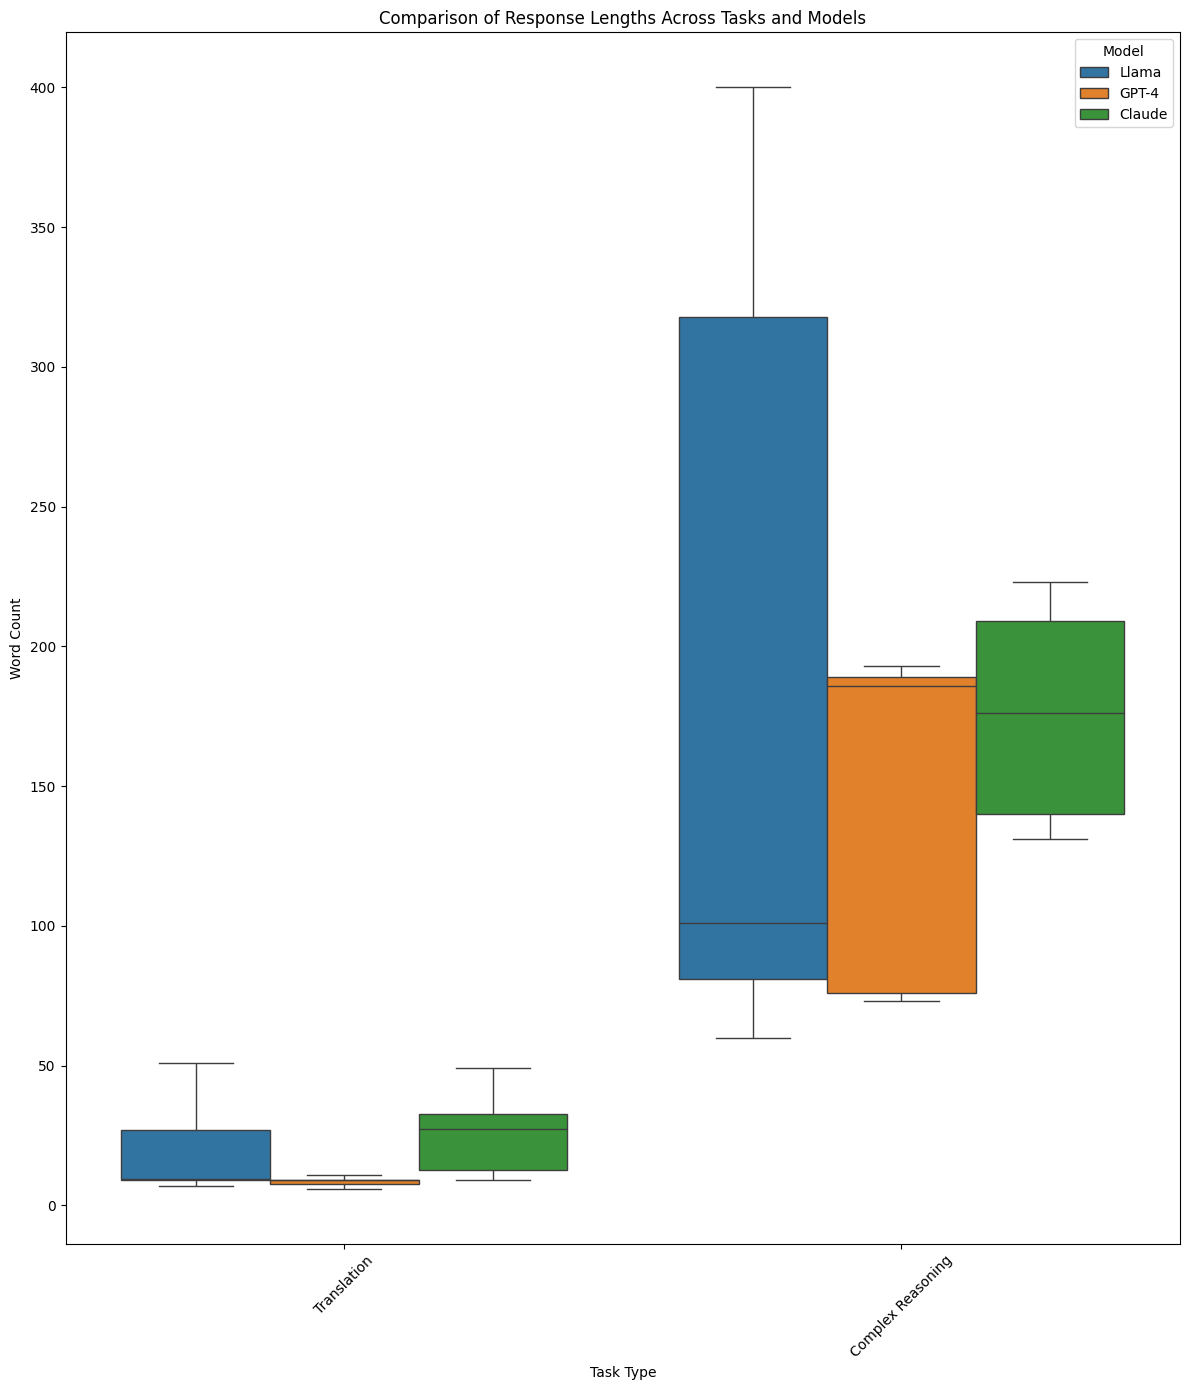


Average Word Count by Model and Task Type:
Task Type  Complex Reasoning  Translation
Model                                    
Claude                 175.8         25.7
GPT-4                  143.4          8.5
Llama                  192.0         18.1

Analysis and visualization completed!


In [19]:
def count_words(text):
    return len(text.split())

def analyze_responses(df, task_type):
    analysis = []
    for index, row in df.iterrows():
        task = row['Task']
        for model in ['Llama', 'GPT-4', 'Claude']:
            word_count = count_words(row[model])
            analysis.append({
                'Task': task,
                'Model': model,
                'Word Count': word_count,
                'Task Type': task_type
            })
    return pd.DataFrame(analysis)

translation_analysis = analyze_responses(translation_df, 'Translation')
complex_analysis = analyze_responses(complex_df, 'Complex Reasoning')
#understanding_analysis = analyze_responses(understanding_df, 'Language Understanding')

all_analysis = pd.concat([translation_analysis, complex_analysis])

# Plotting
plt.figure(figsize=(12, 14))
sns.boxplot(x='Task Type', y='Word Count', hue='Model', data=all_analysis)
plt.title('Comparison of Response Lengths Across Tasks and Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average word count by model and task type
avg_word_count = all_analysis.groupby(['Model', 'Task Type'])['Word Count'].mean().unstack()
print("\nAverage Word Count by Model and Task Type:")
print(avg_word_count)

# You may want to implement more sophisticated metrics here, such as:
# - BLEU scores for translation tasks
# - Coherence and relevance scores (requires human evaluation)
# - Accuracy on specific questions or prompts

print("\nAnalysis and visualization completed!")

#Conclusion

This notebook compares the performance of Claude 3.5 Sonnet, GPT-4, and Llama 3.1 405B on various tasks in Indian languages. We've explored:

Translation capabilities
Complex reasoning and text generation
Language understanding and context interpretation